In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

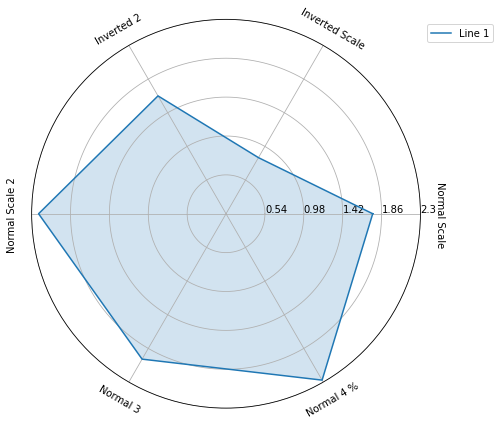

In [2]:
# Code from https://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart
# It is a bit altered from the version on stackexchange though, in order to be more flexible and accessable.
def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges, n_ordinate_levels=6, should_label_all = False):
        """
        Initializes the ComplexRadar instance which is in charge for plotting a radar plot, or spider plot
        as it is commonly known.
        :param fig: Figure on which the graph will be plotted
        :param variables: Variables for which the data is given, their names will be written on angles of circle
        :param ranges: Either a list of ranges in format (start, end) or a single tuple entry of (start, end) where it is assumed that all variables will have same range
        :param n_ordinate_levels: amount of levels inside circle which will represent divided range, default is 6
        :param should_label_all: Whether grid labels for every variable should be written, default is False, and this is recommended to be true when there are variable ranges
        :return Nothing
        """
        angles = np.arange(0, 360, 360./len(variables))
        
        self.should_scale = False
        self.should_label_all = should_label_all
        
        if len(ranges) == 0:
            for i in range(len(variables)-1):
                ranges.append(ranges[0]) # same range for every category
        else:
            first_d1, first_d2 = ranges[0]
            for d_1, d_2 in ranges[1:]:
                if d_1 > first_d2 or d_2 > first_d2:
                    self.should_scale = True
        
        if self.should_label_all:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, \
                label = "axes{}".format(i)) for i in range(len(variables))]
        else:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, label = "axes{}")]
        
        # Place text for variables
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        
        for txt, angle in zip(text, angles):
            if angle > 180:
                txt.set_rotation(angle+90)
            else:
                txt.set_rotation(angle-90)
        
        
        if self.should_label_all:
            for ax in axes[1:]:
                ax.patch.set_visible(False)
                ax.grid("off")
                ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
            
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
        
    def plot(self, data, *args, **kw):
        if self.should_scale:
            # Scaling if we have different ranges of data
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
        # np.r_ brings first number to the end and copmletes a circle
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        if self.should_scale:
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


# example data
variables = ("Normal Scale", "Inverted Scale", "Inverted 2", 
            "Normal Scale 2", "Normal 3", "Normal 4 %")
data = (1.76, 1.1, 1.2, 
        4.4, 3.4, 86.8)
ranges = [(0.1, 2.3), (1.5, 0.3), (0.5, 1.5),
         (1.7, 4.5), (1.5, 3.7), (70, 87)]            
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data, label="Line 1")
radar.fill(data, alpha=0.2)
plt.legend(bbox_to_anchor=(1.20, 1))
plt.show()    

In [3]:
from nba_py import player

In [4]:
melo_id = player.get_player("Carmelo", "Anthony")
george_id = player.get_player("Paul", "George")
westbrook_id = player.get_player("Russell", "Westbrook")
melo_id = melo_id.iloc[0]
george_id = george_id.iloc[0]
westbrook_id = westbrook_id.iloc[0]

In [5]:
curr_season_url = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Efficiency&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="
last_season_url = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Efficiency&Season=2016-17&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [6]:
import requests
headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36'),  # noqa: E501
    'Dnt': ('1'),
    'Accept-Encoding': ('gzip, deflate, sdch'),
    'Accept-Language': ('en'),
    'origin': ('http://stats.nba.com')
    }


In [7]:
def load_nba_dataset(json_data):
    result_data = json_data['resultSets'][0]
    headers = result_data['headers']
    shots = result_data['rowSet']
    data_frame = pd.DataFrame(data=shots, columns=headers)
    return data_frame

In [8]:
curr_tracking = load_nba_dataset(requests.get(curr_season_url, headers=headers).json())
last_tracking = load_nba_dataset(requests.get(last_season_url, headers=headers).json())

In [9]:
melo_only = curr_tracking.loc[curr_tracking.PLAYER_ID == melo_id]
melo_only = melo_only.append(last_tracking.loc[last_tracking.PLAYER_ID == melo_id])
melo_only

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,...,CATCH_SHOOT_FG_PCT,PULL_UP_PTS,PULL_UP_FG_PCT,PAINT_TOUCH_PTS,PAINT_TOUCH_FG_PCT,POST_TOUCH_PTS,POST_TOUCH_FG_PCT,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG_PCT,EFF_FG_PCT
51,2546,Carmelo Anthony,1610612760,OKC,10,4,6,32.4,20.1,1.5,...,0.419,7.0,0.398,0.4,0.167,3.1,0.400,0.8,0.364,0.480
68,2546,Carmelo Anthony,1610612752,NYK,74,29,45,34.3,22.4,1.2,...,0.448,7.9,0.414,1.0,0.646,1.1,0.579,3.0,0.521,0.488


In [10]:
george_only = curr_tracking.loc[curr_tracking.PLAYER_ID == george_id]
george_only = george_only.append(last_tracking.loc[last_tracking.PLAYER_ID == george_id])
george_only

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,...,CATCH_SHOOT_FG_PCT,PULL_UP_PTS,PULL_UP_FG_PCT,PAINT_TOUCH_PTS,PAINT_TOUCH_FG_PCT,POST_TOUCH_PTS,POST_TOUCH_FG_PCT,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG_PCT,EFF_FG_PCT
331,202331,Paul George,1610612760,OKC,10,4,6,34.5,20.1,3.0,...,0.384,4.8,0.344,1.3,0.500,0.6,0.30,0.7,0.429,0.511
371,202331,Paul George,1610612754,IND,74,39,35,35.9,23.9,3.3,...,0.436,6.7,0.422,0.7,0.632,0.7,0.61,1.6,0.541,0.536


In [11]:
westbrook_only = curr_tracking.loc[curr_tracking.PLAYER_ID == westbrook_id]
westbrook_only = westbrook_only.append(last_tracking.loc[last_tracking.PLAYER_ID == westbrook_id])
westbrook_only

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,...,CATCH_SHOOT_FG_PCT,PULL_UP_PTS,PULL_UP_FG_PCT,PAINT_TOUCH_PTS,PAINT_TOUCH_FG_PCT,POST_TOUCH_PTS,POST_TOUCH_FG_PCT,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG_PCT,EFF_FG_PCT
355,201566,Russell Westbrook,1610612760,OKC,10,4,6,34.3,20.1,5.7,...,0.462,6.7,0.326,0.6,0.333,0.2,0.500,0.7,1.000,0.480
403,201566,Russell Westbrook,1610612760,OKC,81,46,35,34.6,31.6,7.7,...,0.364,10.9,0.371,0.4,0.429,0.4,0.344,1.2,0.447,0.476


In [12]:
def get_shot_types_per_game(data_frame, use_other=True, append_team=True):
    columns = ['Drive Points', 'Catch and Shoot Points', 'Pull up Points', 'Paint Points', 'Points From Post', 'Points From Elbow']
    if use_other:
        columns.append('Other')
    if append_team:
        columns.append('TEAM_ABBREVIATION')
    return data_frame[columns]

def rename_data_frame(data_frame):
    data_frame.rename(columns={'DRIVE_PTS': 'Drive Points', 'CATCH_SHOOT_PTS': 'Catch and Shoot Points', \
                              'PULL_UP_PTS' : 'Pull up Points', 'PAINT_TOUCH_PTS': 'Paint Points', \
                              'POST_TOUCH_PTS': 'Points From Post', 'ELBOW_TOUCH_PTS': 'Points From Elbow'}, inplace=True)
    return data_frame

def append_other_column(data_frame):
    data_frame['Other'] = data_frame.POINTS - data_frame.DRIVE_PTS - data_frame.CATCH_SHOOT_PTS - data_frame.PULL_UP_PTS - data_frame.PAINT_TOUCH_PTS - data_frame.POST_TOUCH_PTS - data_frame.ELBOW_TOUCH_PTS
    return rename_data_frame(data_frame)

In [13]:
melo_analysis = get_shot_types_per_game(append_other_column(melo_only))
george_analysis = get_shot_types_per_game(append_other_column(george_only))
westbrook_analysis = get_shot_types_per_game(append_other_column(westbrook_only))

In [14]:
plt.style.use('seaborn-white')

In [37]:
def plot_radar_for_player(player_past_season, player_curr_season, variables, color_past, color_curr, player_name, bbox_to_anchor, n_ordinate_levels=6):
    
    player_max = max(max(player_curr_season), max(player_past_season))

    ranges = [(0.01, player_max)]

    # plotting
    fig1 = plt.figure(figsize=(8, 8))
    radar = ComplexRadar(fig1, variables, ranges, n_ordinate_levels=n_ordinate_levels)
    
    radar.plot(player_past_season, label="Points per game based on play type for " + player_name + " in 2016-17", c=color_past)
    radar.fill(player_past_season, alpha=0.2, c=color_past)

    radar.plot(player_curr_season, label="Points per game based on play type for " + player_name + " in 2017-18 so far", c=color_curr)
    radar.fill(player_curr_season, alpha=0.2, c=color_curr)

    plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, fontsize=11)
    #plt.savefig(player_name + "_radar.jpg", bbox_inches='tight')
    plt.show()    

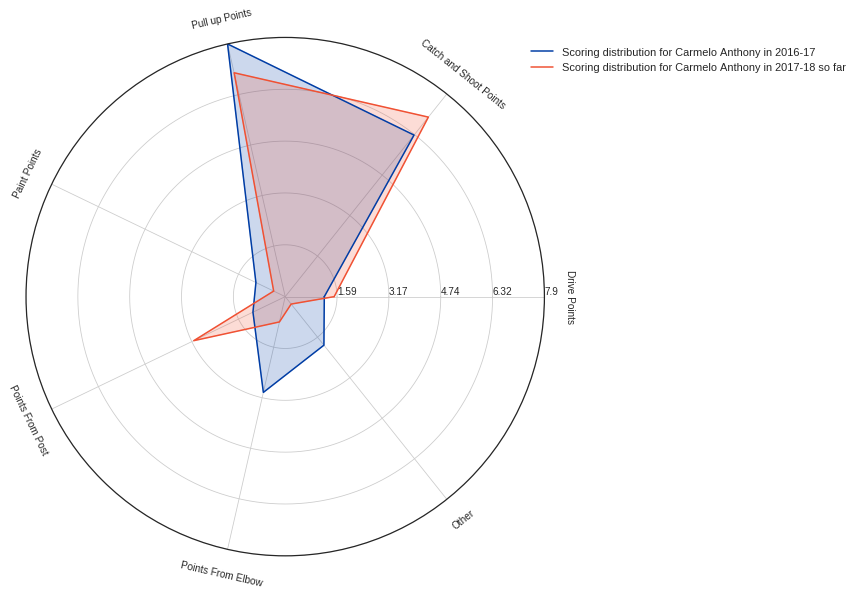

In [16]:
melo_past = melo_analysis.iloc[1].tolist()[:-1]
melo_curr = melo_analysis.iloc[0].tolist()[:-1]

plot_radar_for_player(melo_past, melo_curr, melo_analysis.columns.tolist()[:-1], "#003DA5", "#F05133", "Carmelo Anthony", (1.60, 1))

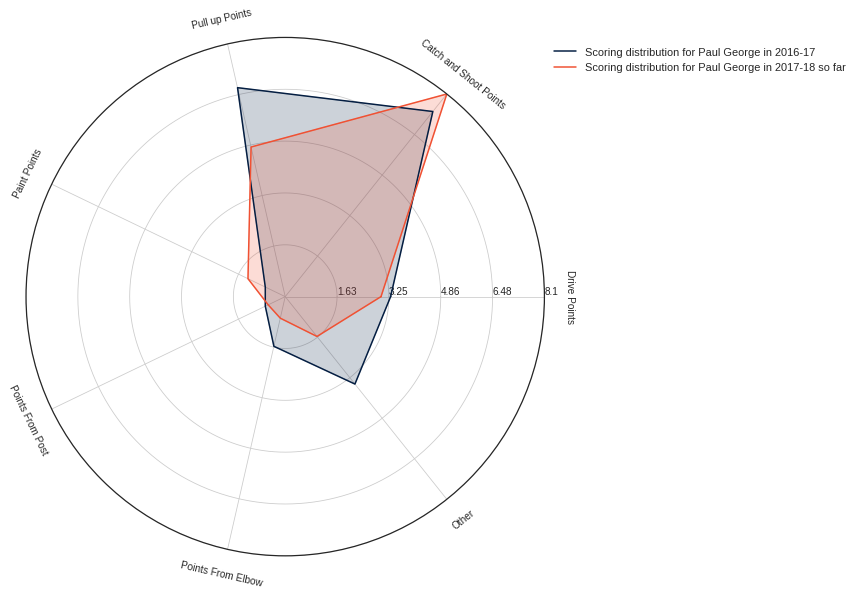

In [17]:
george_past = george_analysis.iloc[1].tolist()[:-1]
george_curr = george_analysis.iloc[0].tolist()[:-1]
plot_radar_for_player(george_past, george_curr, george_analysis.columns.tolist()[:-1], "#041E42", "#F05133", "Paul George", (1.60, 1))

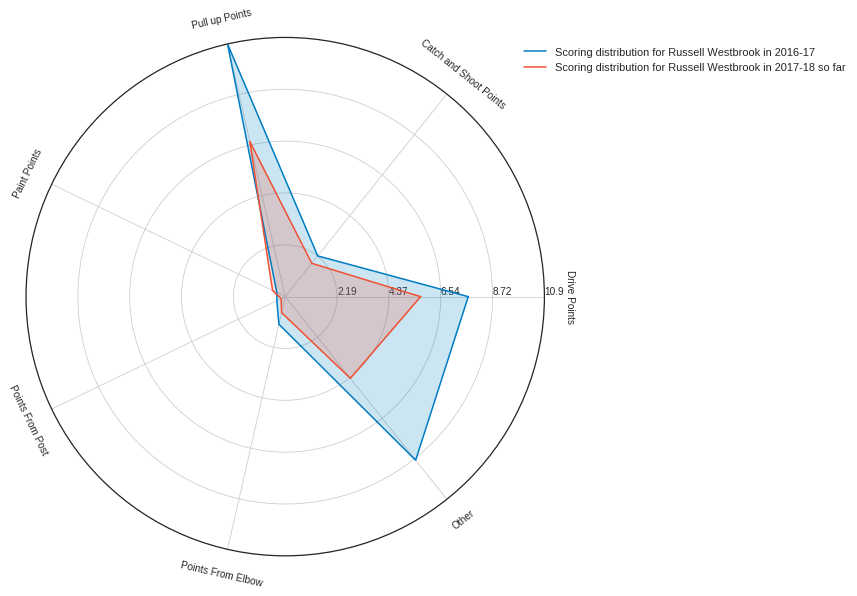

In [18]:
westbrook_past = westbrook_analysis.iloc[1].tolist()[:-1]
westbrook_curr = westbrook_analysis.iloc[0].tolist()[:-1]
plot_radar_for_player(westbrook_past, westbrook_curr, westbrook_analysis.columns.tolist()[:-1], "#007DC3", "#F05133", "Russell Westbrook", (1.60, 1.0))

In [19]:
kyrie_id = player.get_player("Kyrie", "Irving").iloc[0]
kyrie_only = curr_tracking.loc[curr_tracking.PLAYER_ID == kyrie_id]
kyrie_only = kyrie_only.append(last_tracking.loc[last_tracking.PLAYER_ID == kyrie_id])
kyrie_only

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,...,CATCH_SHOOT_FG_PCT,PULL_UP_PTS,PULL_UP_FG_PCT,PAINT_TOUCH_PTS,PAINT_TOUCH_FG_PCT,POST_TOUCH_PTS,POST_TOUCH_FG_PCT,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG_PCT,EFF_FG_PCT
256,202681,Kyrie Irving,1610612738,BOS,11,9,2,33.5,22.3,5.1,...,0.383,5.5,0.394,0.7,0.75,0.2,0.20,0.4,1.000,0.522
283,202681,Kyrie Irving,1610612739,CLE,72,47,25,35.1,25.2,7.1,...,0.482,8.9,0.419,0.9,0.73,0.9,0.69,0.7,0.561,0.535


In [20]:
kyrie_analysis = get_shot_types_per_game(append_other_column(kyrie_only))

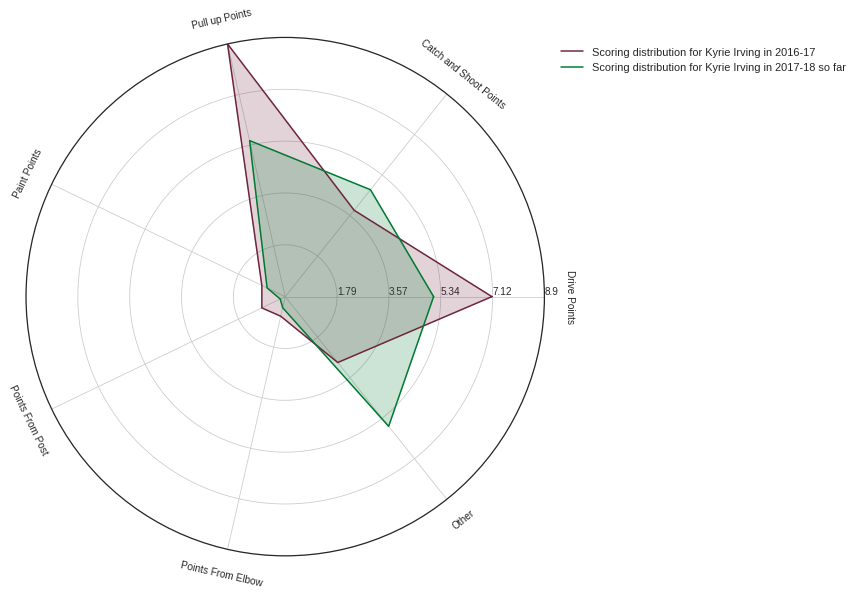

In [21]:
kyrie_past = kyrie_analysis.iloc[1].tolist()[:-1]
kyrie_curr = kyrie_analysis.iloc[0].tolist()[:-1]
plot_radar_for_player(kyrie_past, kyrie_curr, kyrie_analysis.columns.tolist()[:-1], "#6F263D", "#007A33", "Kyrie Irving", (1.60, 1))

In [22]:
def load_nba_dataset_direct_json(json_data):
    shots = json_data['results']
    data_frame = pd.DataFrame(data=shots)
    return data_frame

In [23]:
def create_play_type_dataset(target_stat, player_team_id, is_player=True):

    play_types = ['misc', 'isolation', 'transition', 'PRBallHandler', 'PRRollman', 'postup', 'offrebound', 'spotup', 'handoff', 'cut', 'offscreen']
    column_names = ['Misc', 'Isolation', 'Transition', 'PnR - Ball Handler', 'PnR - Roll Man', 'Post Up', 'Put Back', 'Spot Up', 'Handoff', 'Cut', 'Off Screen']
    player_current_list, player_past_list = [], []
    for i, play_type in enumerate(play_types):
        if is_player:
            player_or_team = "player"
        else:
            player_or_team = "team"
        url_type_curr = "https://stats-prod.nba.com/wp-json/statscms/v1/synergy/" + player_or_team + "/?category=" + play_type + "&limit=500&names=offensive&q=2516338&season=2017&seasonType=Reg"
        url_type_past = "https://stats-prod.nba.com/wp-json/statscms/v1/synergy/" + player_or_team + "/?category=" + play_type + "&limit=500&names=offensive&q=2516338&season=2016&seasonType=Reg"
        past_df = load_nba_dataset_direct_json(requests.get(url_type_past, headers=headers).json())
        curr_df = load_nba_dataset_direct_json(requests.get(url_type_curr, headers=headers).json())
        if is_player:
            identifier = "PlayerIDSID"
        else:
            identifier = "TeamIDSID"
        if past_df[identifier].isin([player_team_id]).any():
            past_df = past_df.loc[past_df[identifier] == player_team_id]
            player_past_list.append(past_df[target_stat].iloc[0])
        else:
            player_past_list.append(0.01)
        if curr_df[identifier].isin([player_team_id]).any():
            curr_df = curr_df.loc[curr_df[identifier] == player_team_id]
            player_current_list.append(curr_df[target_stat].iloc[0])
        else:
            player_current_list.append(0.01)
        
    return player_current_list, player_past_list, column_names

In [32]:
curr, past, columns = create_play_type_dataset('PPG', kyrie_id)

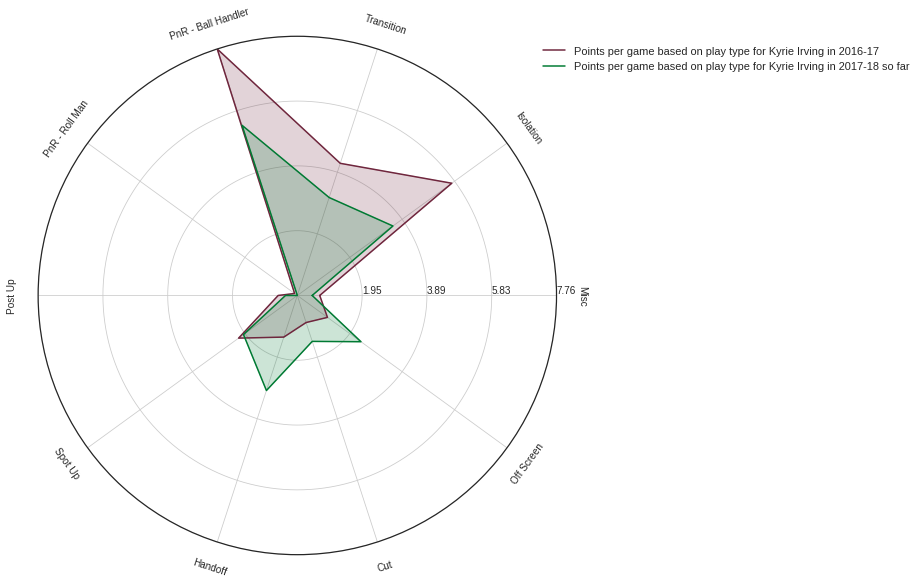

In [38]:
plot_radar_for_player(past, curr, columns, "#6F263D", "#007A33", "Kyrie Irving", (1.70, 1), n_ordinate_levels=5)

In [26]:
curr_season_url = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerOrTeam=Team&PlayerPosition=&PtMeasureType=Efficiency&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=1610612738&VsConference=&VsDivision=&Weight="
last_season_url = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerOrTeam=Team&PlayerPosition=&PtMeasureType=Efficiency&Season=2016-17&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=1610612738&VsConference=&VsDivision=&Weight="

In [27]:
celtics_curr = load_nba_dataset(requests.get(curr_season_url, headers=headers).json())
celtics_past = load_nba_dataset(requests.get(last_season_url, headers=headers).json())

In [28]:
celtics_scores_curr = get_shot_types_per_game(append_other_column(celtics_curr), append_team=False)
celtics_scores_past = get_shot_types_per_game(append_other_column(celtics_past), append_team=False)

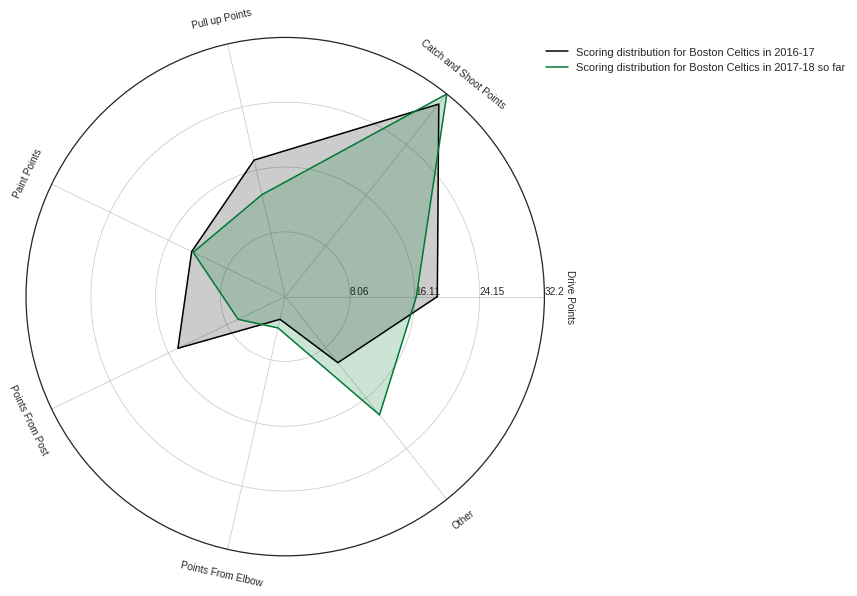

In [29]:
plot_radar_for_player(celtics_scores_past.iloc[0].tolist(), celtics_scores_curr.iloc[0].tolist(), celtics_scores_curr.columns.tolist(), "#000000", "#007A33", "Boston Celtics", (1.60, 1), n_ordinate_levels=5)

In [30]:
curr, past, columns = create_play_type_dataset('PPG', 1610612738, is_player=False)

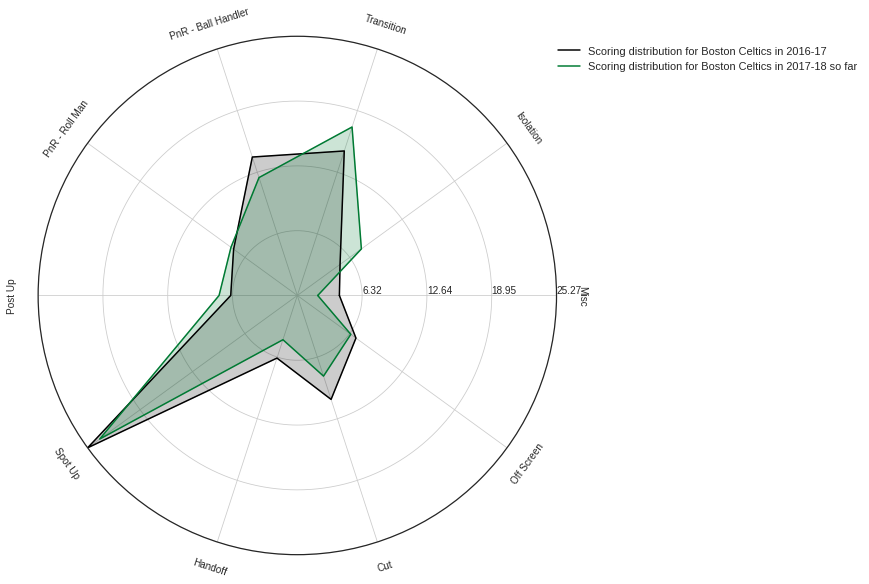

In [31]:
plot_radar_for_player(past, curr, columns, "#000000", "#007A33", "Boston Celtics", (1.60, 1), n_ordinate_levels=5)